# NumPy & Matplotlib


Das Package [NumPy](https://numpy.org/) stellt mehrdimensionale Arrays und Funktionen zum Rechnen mit diesen Arrays zur Verfügung. [Matplotlib](https://matplotlib.org/) ist eine umfangreiche Programmbibliothek, um statische, animierte und interaktive Visualisierungen in Python zu erzeugen. Beide bilden die Basis für viele weiterführende Packages im Bereich der Data Sciences.

Im Modul *Programmieren* wurden die Grundlagen von NumPy bereits vermittelt. Zusätzlich zu diesen Unterlagen gibt es im Internat sehr viele Tutorials zu Numpy. Diese drei Websites erklären die Grundlagen recht gut:

- ["Python für Naturwissenschaftler", Gert-Ludwig Ingold](https://gertingold.github.io/pythonnawi/numpy.html)
- ["Einführung in die wissenschaftliche Programmierung mit Python", Meik Hellmund](https://www.math.uni-leipzig.de/~hellmund/Vorlesung/numpy2.html)
- ["NumPy Tutorial", Bernd Klein](https://www.python-kurs.eu/numpy.php)

Und diese Serie von Videos ist zu empfehlen:

- ["Data Science in Python", The Morpheus Tutorials](https://youtube.com/playlist?list=PLNmsVeXQZj7o46LI06XkxAqcg4Ucm7pwn)

Das Package [Matplotlib](https://matplotlib.org/) bildet die Basis für Visualisierung in Python. Andere Packages wie [Seaborn](https://seaborn.pydata.org/) bauen darauf auf, weshalb es wichtig ist, die Grundlagen von Matplotlib zu beherrschen. Die Dokumentation unter https://matplotlib.org/ ist sehr ausführlich und eine erste Übersich findet man hier:

- [Plot types](https://matplotlib.org/stable/plot_types/index.html)
- [Quick start guide](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)

Hier ist nicht das Ziel, alle Funktionalitäten von Numpy und Matplotlib durchzugehen, sondern anhand von Beispielen die Möglichkeiten kennenzulernen, so dass man sich später selbst mithilfe der Dokumentation und weiteren Tutorials zurechtfindet.

Zunächst müssen wir die beiden Packages importieren. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt


## Arrays erzeugen

### Übersicht

Einige hilfreiche Funktionen für das Erzeugen von Arrays sind:


| Funktion | Resultat |
| ---------|----------|
| `np.array(iterable)` | Array aus einem Iterable (Liste, Tuple, ect.)
| [`np.empty(shape)`](https://numpy.org/doc/stable/reference/generated/numpy.empty.html) und [`np.empty_like(arr)`](https://numpy.org/doc/stable/reference/generated/numpy.empty_like.html) | Leeres Array mit angegebener Shape bzw. gleicher Shape wie ein anderes Array `arr`. Die Werte werden nicht initialisiert, so dass einfach die Zahlen drin stehen, die im wiederverwendeten Speicher bereits drin standen. Das ist ideal, wenn die Werte auf jeden Fall später neu gesetzt werden. |
| [`np.zeros(shape)`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) und [`np.zeros_like(arr)`](https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html) | Array mit lauter Nullen (0). |
| [`np.ones(shape)`](https://numpy.org/doc/stable/reference/generated/numpy.ones.html) und [`np.ones_like(arr)`](https://numpy.org/doc/stable/reference/generated/numpy.ones_like.html) | Array mit lauter Einsen (1). |
| [`np.arange(start=0, stop, step=1)`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) | Array mit fortlaufenden Zahlen mit gegebenem Abstand (`step`), analog zu `range()` |
| [`np.linspace(start, stop, num=50)`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) | Array mit gleichmässig verteilten Zahlen mit gegebener Anzahl (`num`) |
| [`np.logspace(start, stop, num=50)`](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html) | Array mit logarithmisch gleichmässigem verteilten Zahlen (Exponenten sind linear) |

Hier ist die [komplette Übersicht in der Dokumentation](https://numpy.org/doc/stable/reference/routines.array-creation.html).

### Beispiele

In [3]:
a = np.array([4, 7, 2])
a


array([4, 7, 2])

In [4]:
np.empty_like(a)

array([16843009, 16843009, 16843009])

In [5]:
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

### Linspace und Logspace für Darstellung von Funktionen

In diesem Beispiel stellen wir die Funktion $y(x) = x^2 + 3/x$ und ihre Ableitung $y'(x) = 2x - 3/x^2$ in zwei untereinanderliegenden Koordinatensystemen dar.

Dazu wird [`plt.subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) verwendet, um die beiden Koordinatensysteme `ax1` und `ax2` ([`Axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html) Objekte) zu erzeugen.

Statt `plt.ylabel` und `plt.ylim` etc. brauchen wir jetzt `ax2.set_ylabel` und `ax2.set_ylim`.

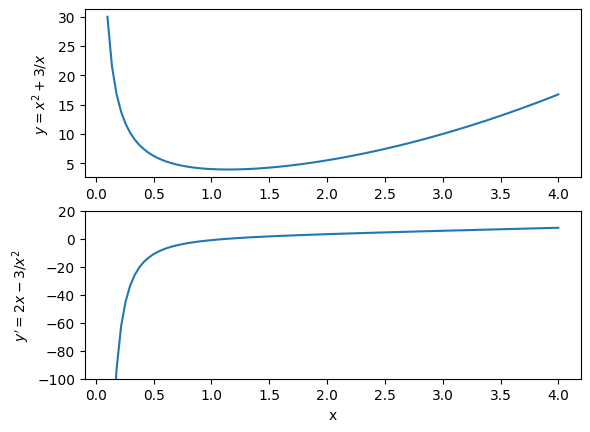

In [6]:
x = np.linspace(0.1, 4, num=100)
y = x**2 + 3 / x
yprime = 2*x - 3 / x**2

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(x, y)
ax1.set_ylabel("$y = x^2 + 3/x$")
ax2.plot(x, yprime)
ax2.set_ylim([-100, 20])
ax2.set_ylabel("$y' = 2x - 3/x^2$")
ax2.set_xlabel('x')
plt.show()

Beispiel mit logarithmischer Skala

In [7]:
x = np.logspace(-2, 3, num=6)
x

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

Die Potenzfunktion erscheint als Gerade im doppelt-logarithmischen Diagramm. Mit [`plt.loglog`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.loglog.html), [`plt.semilogx`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogx.html) und [`plt.semilogy`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogy.html) kann man auch ohne das Verändern der Skalierung von Hand mittels [`plt.xscale`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xscale.html) bzw. [`plt.yscale`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yscale.html) auskommen.

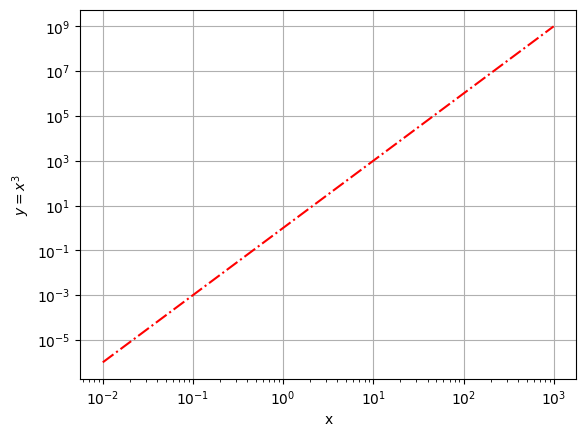

In [8]:
plt.plot(x, x**3, 'r-.')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel('x')
plt.ylabel('$y = x^3$')
plt.show()

## Rechnen mit Arrays

### List-Comprehension vs. NumPy

NumPy ist viel schneller

In [9]:
l = list(range(1000))
a = np.arange(1000)
%timeit [x**2 + 2*x for x in l]
%timeit a**2 + 2*a

325 µs ± 17.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
5.24 µs ± 425 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Verschiedene Produkte

In [10]:
a = np.arange(1, 4)
b = np.arange(0, 3)
a, b

(array([1, 2, 3]), array([0, 1, 2]))

In [11]:
print("elementweise:\n", a * b)
print("dot:\n", a.dot(b))
print("at:\n", a @ b)
print("inner:\n", np.inner(a, b))
print("outer(a):\n", np.outer(a, b))

elementweise:
 [0 2 6]
dot:
 8
at:
 8
inner:
 8
outer(a):
 [[0 1 2]
 [0 2 4]
 [0 3 6]]


Das innere Produkt [`np.inner`](https://numpy.org/doc/stable/reference/generated/numpy.inner.html) entspricht bei zwei Vektoren dem Skalarprodukt und bei zwei Matrizen (2d-Arrays) der Matrizenmultiplikation.

Das äussere Produkt [`np.outer`](https://numpy.org/doc/stable/reference/generated/numpy.outer.html) ist das Kreuzprodukt, bekannt aus dem Modul *Daten & Information*.

## Lineare Algebra

NumPy deckt viele Bereiche der numerischen linearen Algebra ab, siehe https://numpy.org/doc/stable/reference/routines.linalg.html. Hier die wichtigsten Beispiele.

In [12]:
# Einheitsmatrix erzeugen
e3 = np.eye(3)
e3


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [13]:
# Diagonalmatrix erzeugen
d = np.diag([5, 6, 2])
d


array([[5, 0, 0],
       [0, 6, 0],
       [0, 0, 2]])

In [14]:
# Matrizen multiplizieren
a = np.array(
    [
        [1, 0],
        [0, 1],
        [2, 2],
    ]
)
print("matmul\n", np.matmul(d, a))
print("dot\n", d.dot(a))


matmul
 [[5 0]
 [0 6]
 [4 4]]
dot
 [[5 0]
 [0 6]
 [4 4]]


In [15]:
# Determinante
b = np.array([[2, 3], [1, 1]])
np.linalg.det(b)


-1.0

In [16]:
# Inverses
np.linalg.inv(b)


array([[-1.,  3.],
       [ 1., -2.]])

In [17]:
# Eigenwerte und Eigenvektoren
w, v = np.linalg.eig(b)
print(w)
print(v)


[ 3.30277564 -0.30277564]
[[ 0.91724574 -0.79325185]
 [ 0.3983218   0.60889368]]


In [18]:
# Die Spalten der Matrix v sind die Eigenvektoren zu den Eigenwerten im 1d-Array w:
for i, wi in enumerate(w):
    print(f"Eigenwert {i} ist {w[i]} mit Eigenvektor {v[:,i]}")


Eigenwert 0 ist 3.3027756377319943 mit Eigenvektor [0.91724574 0.3983218 ]
Eigenwert 1 ist -0.3027756377319948 mit Eigenvektor [-0.79325185  0.60889368]


## Shape und Reshaping

In [19]:
# Shape
a = np.arange(50)
a.shape


(50,)

In [20]:
# Reshape in eines 25 x 2 Matrix
a.reshape(25, 2)

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19],
       [20, 21],
       [22, 23],
       [24, 25],
       [26, 27],
       [28, 29],
       [30, 31],
       [32, 33],
       [34, 35],
       [36, 37],
       [38, 39],
       [40, 41],
       [42, 43],
       [44, 45],
       [46, 47],
       [48, 49]])

In [21]:
# Reshape in eine 5 x 10 Matrix.
# Die -1 bestimmt hier automatisch, wie gross diese Dimension sein muss, damit es aufgeht.
b = a.reshape(5, -1)
print(b.shape)
print(b)


(5, 10)
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]]


In [22]:
# Transponieren
bt = b.T
print(bt)


[[ 0 10 20 30 40]
 [ 1 11 21 31 41]
 [ 2 12 22 32 42]
 [ 3 13 23 33 43]
 [ 4 14 24 34 44]
 [ 5 15 25 35 45]
 [ 6 16 26 36 46]
 [ 7 17 27 37 47]
 [ 8 18 28 38 48]
 [ 9 19 29 39 49]]


**Reshape und Transpose erzeugen nur Sichten (view) auf das ursprüngliche Array!** Sonst [`np.copy`](https://numpy.org/doc/stable/reference/generated/numpy.copy.html) verwenden.

In [23]:
bt[0, 0] = 101
print(bt)
print(b)
print(a)


[[101  10  20  30  40]
 [  1  11  21  31  41]
 [  2  12  22  32  42]
 [  3  13  23  33  43]
 [  4  14  24  34  44]
 [  5  15  25  35  45]
 [  6  16  26  36  46]
 [  7  17  27  37  47]
 [  8  18  28  38  48]
 [  9  19  29  39  49]]
[[101   1   2   3   4   5   6   7   8   9]
 [ 10  11  12  13  14  15  16  17  18  19]
 [ 20  21  22  23  24  25  26  27  28  29]
 [ 30  31  32  33  34  35  36  37  38  39]
 [ 40  41  42  43  44  45  46  47  48  49]]
[101   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49]


## Matrizen Darstellen

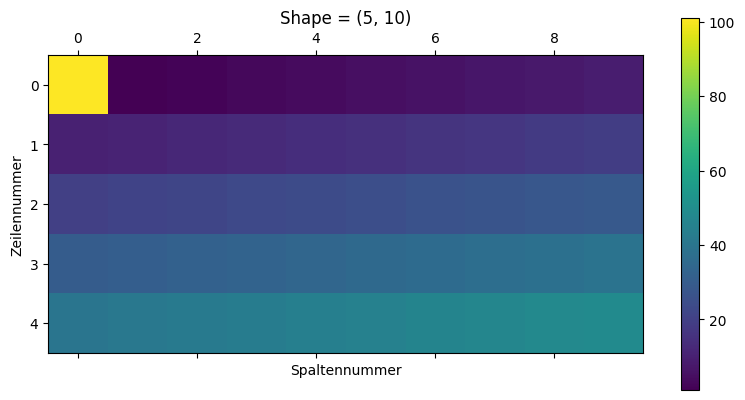

In [26]:
plt.matshow(b)
plt.colorbar()
plt.xlabel("Spaltennummer")
plt.ylabel("Zeilennummer")
plt.title(f"Shape = {b.shape}")
plt.show()

## Indizieren (Slicing) und Filtern

In [ ]:
# Ein paar Beispiele
x = np.array([[3, 5, 1], [6, 7, 9]])


In [ ]:
# 'alle Zeilen, 0-te Spalte'
x[:,0]

array([3, 6])

In [ ]:
# 1-te Zeile, alle Spalten bis und ohne die 2-te
x[1,:2]

array([6, 7])

In [ ]:
# Wo sind Werte grösser als 3? => Boolean Array
x > 3

array([[False,  True, False],
       [ True,  True,  True]])

In [ ]:
# Filter als Index verwenden, um die Werte zu erhalten, die den Filter erfüllen
x[x > 3]

array([5, 6, 7, 9])

In [ ]:
# Suchen und ersetzen mit np.where
np.where(x >= 5, x, 5)

array([[5, 5, 5],
       [6, 7, 9]])

In [ ]:
# Gefilterte Werte durch Werte aus einem anderen Array (y) ersetzen.
y = np.array([[34, 76, 88], [0, 2, 6]])
np.where(x >= 5, x, y)

array([[34,  5, 88],
       [ 6,  7,  9]])

## Zufallszahlen erzeugen

Übersicht zu Pseudo-Zufallszahlen: https://numpy.org/doc/stable/reference/random/index.html

Zuerst mit `np.random.default_rng(seed)` einen Generator initialisieren. Der **Seed** bestimmt, wie der Generator initialisiert wird. Die Zufallszahlen sind dann **reproduzierbar**.

In [27]:
rng = np.random.default_rng(seed=1)

### Ganze Zahlen: Integers

In [ ]:
r = rng.integers(1, 10, size=(8, 5))
print(r)

In [ ]:
plt.matshow(r)
plt.colorbar()
plt.xlabel("Spaltennummer")
plt.ylabel("Zeilennummer")
plt.title(f"Zufallszahlen mit Shape = {r.shape}")
plt.show()

### Normalverteilte Zahlen

In [ ]:
x = np.arange(20)
y = rng.normal(size=x.shape)

In [ ]:
plt.plot(x, y, ".")


## Daten importieren und exportieren

Hier ist die Übersicht: https://numpy.org/doc/stable/reference/routines.io.html.

Um kommaseparierte Werte (CSV) zu lesen und schreiben verwenden wir [`np.loadtxt`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) und [`np.savetxt`](https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html). Effizientere und speichersparende Methoden existieren, sind hier aber nicht Thema.

Beim Import muss das Dateiformat zuerst angeschaut werden.

In [ ]:
bac = np.loadtxt("bacteria_nutrient.csv", delimiter=',', skiprows=1)
bac

In [ ]:
np.savetxt("out.csv", bac)